In [38]:
from ultralytics import RTDETR
import torch; device = "cuda" if torch.cuda.is_available() else "cpu"; print(device)

cuda


In [59]:
# Load a COCO-pretrained RT-DETR-l model
model = RTDETR('rtdetr-l.pt').to(device)
# model = RTDETR('rtdetr-x.pt').to(device) # Extra Large

# Display model information (optional)
model.info()

# # Train the model on the COCO8 example dataset for 100 epochs
# results = model.train(data='coco8.yaml', epochs=100, imgsz=640)

rt-detr-l summary: 673 layers, 32970476 parameters, 0 gradients


(673, 32970476, 0, 0)

- `rtdetr-x.pt`: 55ms per frame with (1200 * 2000) | 34 ms per frame (384 * 384)
- `rtdetr-l.pt`: 49ms per frame with (1200 * 2000) | 25 ms per frame (384 * 384)

In [60]:
%%timeit
results = model('assets/demo1_384.jpg')


image 1/1 /mnt/c/Users/Sergiu/Desktop/AnomalyDetection/assets/demo1_384.jpg: 640x640 4 21s, 15.1ms
Speed: 1.0ms preprocess, 15.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/c/Users/Sergiu/Desktop/AnomalyDetection/assets/demo1_384.jpg: 640x640 4 21s, 16.6ms
Speed: 1.7ms preprocess, 16.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/c/Users/Sergiu/Desktop/AnomalyDetection/assets/demo1_384.jpg: 640x640 4 21s, 16.3ms
Speed: 1.2ms preprocess, 16.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/c/Users/Sergiu/Desktop/AnomalyDetection/assets/demo1_384.jpg: 640x640 4 21s, 16.5ms
Speed: 1.3ms preprocess, 16.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt/c/Users/Sergiu/Desktop/AnomalyDetection/assets/demo1_384.jpg: 640x640 4 21s, 18.7ms
Speed: 1.5ms preprocess, 18.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /mnt

25.4 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
import matplotlib.pyplot as plt

results = model('assets/demo1_384.jpg')

# Visualize the results on the frame
annotated_frame = results[0].plot()

# Check and convert to RGB if necessary
if annotated_frame.shape[-1] == 3:  # Ensure it's a color image
    annotated_frame = annotated_frame[..., ::-1]  # Convert BGR to RGB


image 1/1 /mnt/c/Users/Sergiu/Desktop/AnomalyDetection/assets/demo1_384.jpg: 640x640 9 21s, 288.1ms
Speed: 2.4ms preprocess, 288.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


In [55]:
annotated_frame.shape

(384, 384, 3)

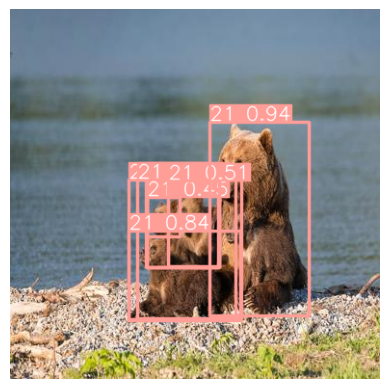

In [56]:
%matplotlib inline
# Display the annotated frame
plt.imshow(annotated_frame)
plt.axis('off')
plt.show()